In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as pl
import thinkdsp as td


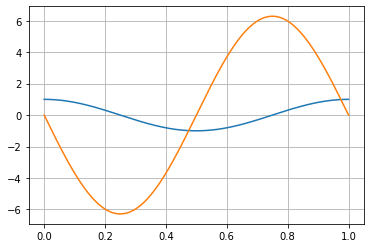

In [88]:
x= np.random.random(size= 1000)
x= pd.Series(x)

π= np.pi
Fs= 10000
dt= 1/Fs

T= 1
t= np.linspace(0, T, T*Fs+1)
f= 1

x= np.cos(2*π*f*t)
x= pd.Series(x)
#x.plot(grid=True)

dx= x.diff()/dt
#dx.plot(grid=True)
pl.plot(t,x,t,dx)
pl.grid(True)

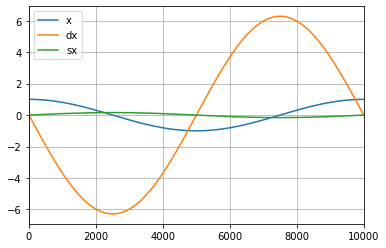

In [89]:
sx= x.cumsum()*dt

x.plot(legend=True, label='x')
dx.plot(legend=True, label='dx')
sx.plot(grid=True, legend=True, label='sx')

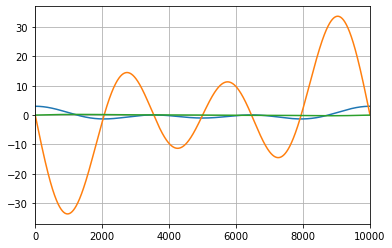

In [92]:
w1= 1*f*2*π
w2= 2*f*2*π
w3= 3*f*2*π

x= np.cos(w1*t)+np.cos(w2*t)+np.cos(w3*t)
x= pd.Series(x)

x.plot()
(x.diff()/dt).plot()
(x.cumsum()*dt).plot(grid=True)

In [95]:
x, dx,sx

(0        3.000000
 1        2.999997
 2        2.999989
 3        2.999975
 4        2.999956
            ...   
 9996     2.999956
 9997     2.999975
 9998     2.999989
 9999     2.999997
 10000    3.000000
 Length: 10001, dtype: float64, 0             NaN
 1       -0.001974
 2       -0.005922
 3       -0.009870
 4       -0.013817
            ...   
 9996     0.017765
 9997     0.013817
 9998     0.009870
 9999     0.005922
 10000    0.001974
 Length: 10001, dtype: float64, 0        1.000000e-04
 1        2.000000e-04
 2        2.999999e-04
 3        3.999997e-04
 4        4.999994e-04
              ...     
 9996    -2.999997e-04
 9997    -1.999999e-04
 9998    -9.999998e-05
 9999     1.346701e-17
 10000    1.000000e-04
 Length: 10001, dtype: float64)

In [102]:
x.cumsum().diff()

0             NaN
1        2.999997
2        2.999989
3        2.999975
4        2.999956
           ...   
9996     2.999956
9997     2.999975
9998     2.999989
9999     2.999997
10000    3.000000
Length: 10001, dtype: float64

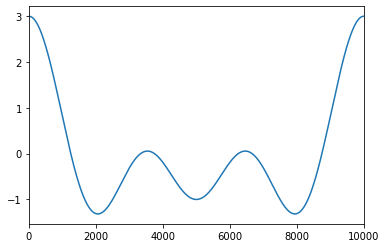

In [111]:
x.plot()

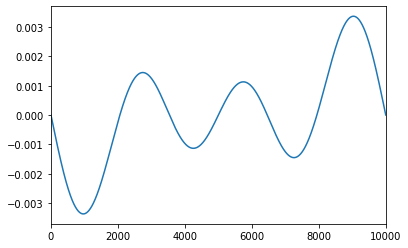

In [112]:
x.diff().plot()

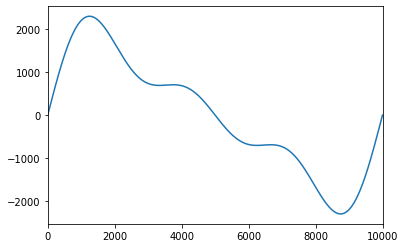

In [113]:
x.cumsum().plot()

In [140]:
N= x.size
k= np.arange(N)


dxx= np.fft.ifft(
    np.fft.fft(x)
    *(1-np.exp(-1j*2*π/N*k))).real
sxx= np.fft.ifft(
    np.fft.fft(x)
    /(1-np.exp(-1j*2*π/N*k))).real


C:\Anaconda3-2019.10\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [141]:
dx= x.diff()
sx= x.cumsum()

In [128]:
np.allclose(dx[1:],dxx[1:])

True

In [142]:
sx

0        3.000000e+00
1        5.999997e+00
2        8.999986e+00
3        1.199996e+01
4        1.499992e+01
             ...     
9996    -8.999961e+00
9997    -5.999986e+00
9998    -2.999997e+00
9999    -1.292610e-11
10000    3.000000e+00
Length: 10001, dtype: float64

In [143]:
sxx

array([nan, nan, nan, ..., nan, nan, nan])

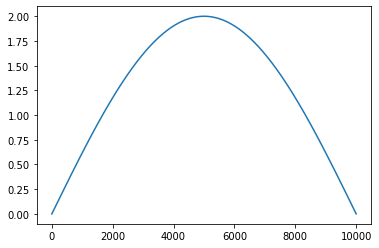

In [147]:
pl.plot(abs(1-np.exp(-1j*2*π/N*k)))

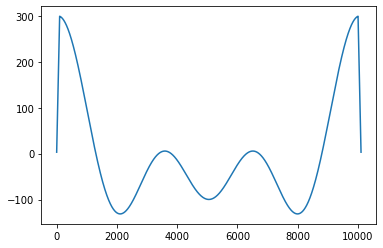

In [154]:
pl.plot(np.convolve(x,np.ones(100)))